<a href="https://colab.research.google.com/github/BeaEsparcia/Analisis_Sentimientos_X/blob/main/Sentiment_Analysis_on_X_Feminism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project performs sentiment analysis on a collection of tweets discussing feminism. The main goal is to identify and categorize the predominant emotions in these posts using a pre-trained Natural Language Processing (NLP) model.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                                 text          label
0   El feminismo arruinó el mundo y algunas aún no...  Very Negative
1   @perezreverte Sobre mujer y #feminismo hay muc...  Very Positive
2   Erradicando toda clase de injusticias: El Movi...  Very Negative
3   La mejor ministra que ha tenido este país #ire...  Very Positive
4   Todas las políticas woke quieren acabar con el...  Very Positive
5   Y finalmente la #masculinidad #tóxica se basa ...  Very Negative
6   Me cago en la cuotas vaginales. Ahora resulta ...  Very Positive
7   SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marz...  Very Negative
8   En el autobús, 8 personas hablando de machismo...  Very Negative
9   el feminismo es la justicia de este siglo #fem...  Very Positive
10  Sin #Abolición de la #Prostitución, no habrá i...  Very Negative
11  Viva la LUCHA FEMINISTA #feminismo #igualdad #...  Very Positive
12  «No hay barrera cerradura, ni cerrojo que pued...  Very Positive
13  Emmeline Pankhurst fue la líde

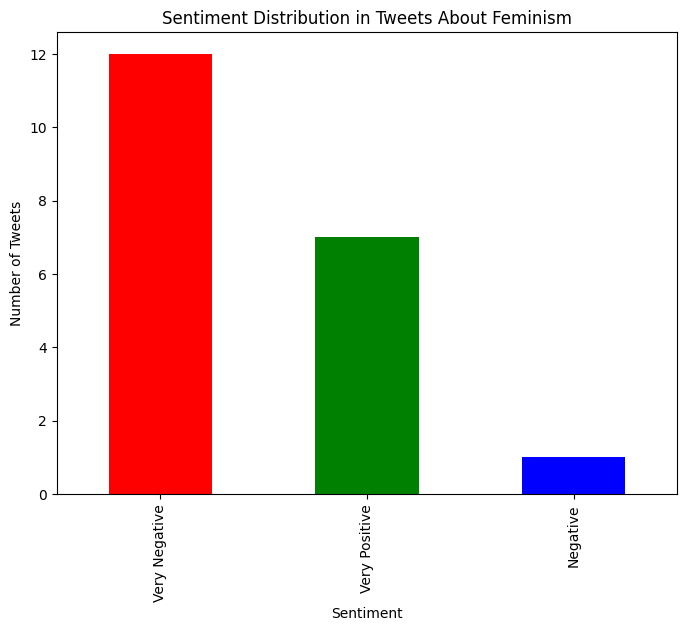

In [1]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Load the sentiment analysis pipeline with a pre-trained model
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# List of tweets to analyze
tweets = [
    "El feminismo arruinó el mundo y algunas aún no la ven.",
    "@perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore. Lo que hemos querido ha sido traer a autoridades, un discurso serio de mujeres con una presencia y una trayectoria importante y consolidada, mujeres decisivas e influyentes de verdad, no para que nos cuenten lo que debe ser la mujer en el futuro, que todos lo sabemos, sino cómo es la mujer ahora y cómo se ha hecho, hasta dónde han llegado, por qué, cómo y contra qué. Ese tipo de mujeres que son las que nos interesan de verdad, con discursos solventes y serios, con autoridad, son las que realmente van a ocupar los asientos en estas tres jornadas.",
    "Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional, lo que significa que reconoce y aborda las intersecciones de la opresión, incluidas la raza, la clase, la sexual…",
    "La mejor ministra que ha tenido este país #irenemontero #feminismo",
    "Todas las políticas woke quieren acabar con el prototipo de hombre necesario para la sociedad",
    "Y finalmente la #masculinidad #tóxica se basa en lo q dije pq si la mujer deja de depender de un hombre, el hombre ve que ya no aporta, q ya no le dependen,…y deja de sentirse hombre",
    "Me cago en la cuotas vaginales. Ahora resulta que la empresa que me echó de la formación se arrepiente y me ofrece la posibilidad de trabajar con ellos, y yo ocupo el lugar de una mujer que no ha durado ni un día. Alucinante.",
    "SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marzo #8M",
    "En el autobús, 8 personas hablando de machismo en España. 7 tíos jóvenes diciendo que hay machismo y la única tía jóven niega que haya machismo. Los hombres jóvenes están agilipollados.",
    "el feminismo es la justicia de este siglo #feminismo #irenemontero #8Marzo #8M",
    "Sin #Abolición de la #Prostitución, no habrá igualdad El #Feminismo es #Abolicionista. Los seres humanos no son mercancía que vender y con la que tratar. #AbolicionProstitucion #ProstitucionEsViolenciaSexual",
    "Viva la LUCHA FEMINISTA #feminismo #igualdad #8Marzo #8M",
    "«No hay barrera cerradura, ni cerrojo que puedas imponer a la libertad de tu mente» Virginia Woolf #TalDiaComoHoy moría una de las grandes de la historia dla #literatura en general y del #feminismo #NOALOLVIDO #ComparteCultura #Cultura #MemoriaHistórica #feminismo",
    "Emmeline Pankhurst fue la líder del movimiento feminista y sufragista del Reino Unido. Fue encarcelada en múltiples ocasiones y llevó a cabo varias huelgas de hambre dentro de la prisión a modo de protesta. #feminismo #feministasabolicionistas #feminismoradical",
    "Las feministas vandalizaron el #8M la Universidad del Rosario en #Bogota. Han pasado 20 días y nada que limpian. ¡Dañaron nuestro patrimonio cultural y hay que saber cuánto nos costará su chiste a la ciudadanía! #NoAlVandalismo #feminismo #izquierda #Colombia",
    "#Feminismo #Hombres #Mujeres #DerechosHumanos Lo dicho: Las feministas tienen envidia de pene.",
    "Las denuncias falsas no existen ya... Al menos 1 de cada 7 de todos los hombres ha sufrido una acusación falsa de agresión o violencia sexual. Eso es mucho más que los agresores auténticos... En divorcios, más del 50% de denuncias resultan ser falsas",
    "Miles de hombres se suicidan en nuestro país cada año Cuántos más tendremos que ver morir para que paren esta masacre? Tienen algo que decir sobre esto las mujeres que denuncian en falso?",
    "No somos mujeres. Les damos igual. No. No les damos igual. Peor aún…",
    "No, no hay ningún problema con estar sola. El problema radica en la razón por la que estás sola, si es por odio, resentimiento o porque te has comido la narrativa del 'empoderamiento', entonces si hay un problema; porque esa soledad, no viene de un corazón sano."
]

# Analyze the sentiment of each tweet
sentiment_results = []
for tweet in tweets:
    result = nlp(tweet)
    label = result[0]['label']
    score = result[0]['score']
    sentiment_results.append({"text": tweet, "label": label, "score": score})

# Convert results to a DataFrame
df_results = pd.DataFrame(sentiment_results)

# Simplify model labels
df_results['label'] = df_results['label'].replace({
    "1 star": "Very Negative",
    "2 stars": "Negative",
    "3 stars": "Neutral",
    "4 stars": "Positive",
    "5 stars": "Very Positive"
})

# Display the final DataFrame
print(df_results[['text', 'label']])

# Count of tweets by category
final_count = df_results['label'].value_counts()

# Bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
final_count.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution in Tweets About Feminism')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()